In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install pmdarima
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=69b993745d47f3e1ba3cf5d641d4fa637cbeb747feb853df708c245b54207ac0
  Stored in directory: /root/.cache/pip/wheels/4

In [2]:
# display multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams["lines.linewidth"] = 5.0

# 1. ARIMA

In [5]:
amexdf = yf.download("AXP", start="2017-01-01", progress=False)
visadf = yf.download("V", start="2017-01-01", progress=False)
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
fiservdf = yf.download("FISV", start="2017-01-01", progress=False)
paypaldf = yf.download("PYPL", start="2017-01-01", progress=False)

In [6]:
amexdf.head(3)
visadf.head(3)
mastercarddf.head(3)
fiservdf.head(3)
paypaldf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,74.889999,75.750000,74.739998,75.349998,69.781250,5853900
2017-01-04,75.260002,76.550003,75.059998,76.260002,70.925194,4635800
2017-01-05,76.000000,76.180000,74.820000,75.320000,70.050980,3383000


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,78.760002,79.910004,78.489998,79.500000,76.844185,13785200
2017-01-04,79.440002,80.260002,79.360001,80.150002,77.472488,8033100
2017-01-05,80.339996,81.529999,80.220001,81.089996,78.381088,7805100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280418,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250900,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048378,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,53.41,53.845001,53.244999,53.669998,53.669998,2142600
2017-01-04,53.66,54.365002,53.654999,54.325001,54.325001,1359000
2017-01-05,54.23,54.590000,54.005001,54.305000,54.305000,1662400


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,40.290001,40.980000,40.000000,40.250000,40.250000,8247400
2017-01-04,40.349998,41.029999,40.044998,41.000000,41.000000,6806400
2017-01-05,41.430000,41.720001,41.040001,41.060001,41.060001,6432000


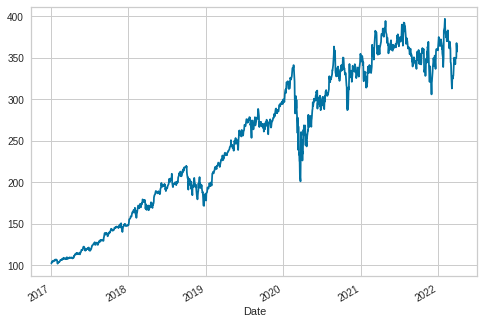

In [64]:
mastercarddf["Adj Close"].plot()

In [65]:
mastercarddf.isnull().sum().sum()

0

In [66]:
mastercarddf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1.322000e+03
mean,253.962489,256.683502,251.087617,253.944350,251.318731,3.913651e+06
std,86.498808,87.666701,85.239815,86.418662,87.180245,1.785565e+06
min,104.410004,105.489998,104.010002,105.000000,102.113091,6.411000e+05
25%,181.227497,183.270000,179.707497,180.964996,177.209839,2.758925e+06
50%,266.570007,270.014999,262.689987,266.779999,263.153702,3.419450e+06
75%,336.760002,340.375000,332.035004,335.809998,334.294350,4.448750e+06
max,393.149994,401.500000,390.700012,396.750000,396.750000,1.503150e+07


In [10]:
# # ril_monthly_df = rildf.resample("1m").mean().sort_values(by="Date", ascending=False)
# amex_monthly_df = amexdf.resample("1m").mean()
# amex_monthly_df.head(3)

In [12]:
# amex_monthly_df['Adj Close'].plot()

In [13]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12)
# figure = decomposition.plot()
# plt.show()

In [68]:
mastercarddf["Return"] = np.log(mastercarddf["Adj Close"]) - np.log(mastercarddf["Adj Close"].shift(1))
mastercarddf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280418,4711300,NaN
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250900,3299000,0.009444
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048378,3262200,0.007694


In [69]:
mastercarddf.dropna(inplace=True)

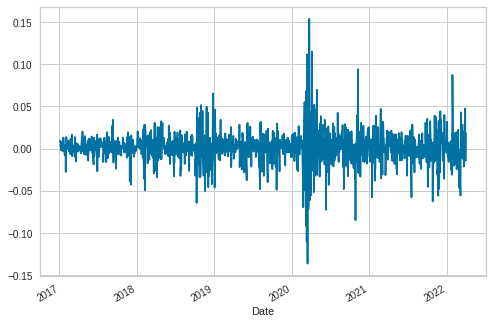

In [70]:
mastercarddf.Return.plot()

In [17]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomposition = seasonal_decompose(amexdf["Adj Close"], period=12, model="multiplicative")
# figure = decomposition.plot()
# plt.show()

In [71]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(mastercarddf["Return"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(mastercarddf["Return"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(mastercarddf["Return"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(mastercarddf["Return"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (4589.083952132386, 0.0)
AndersonResult(statistic=27.883072252240254, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=0.47163456588833175, pvalue=3.783590588182739e-270)
ShapiroWilkTest 0.8965707421302795 6.454029577472245e-29


In [72]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(mastercarddf["Adj Close"])
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(mastercarddf["Adj Close"])
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(mastercarddf["Adj Close"], 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(mastercarddf["Adj Close"])
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (98.20644098782257, 0.0)
AndersonResult(statistic=25.076915769192965, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.9352228045463562 1.609533257533785e-23


In [22]:
# from numpy.random import randn
# data = 5 * randn(100) + 5

In [23]:
# # Tests of Normality
# import scipy.stats as ss

# # Jarque–Bera Test
# statistic = ss.jarque_bera(data)
# print("JarqueBeraTest", statistic)

# # Anderson-Darling Normality Test
# statistic = ss.anderson(data)
# print(statistic)

# # Kolmogorov-Smirnov Test
# statistic = ss.kstest(data, 'norm')
# print(statistic)

# # Shapiro-Wilk Test
# statistic, pvalue = ss.shapiro(data)
# print(f"ShapiroWilkTest ({statistic}, {pvalue})")

In [73]:
# Tests of Stationarity
from statsmodels.tsa import stattools
from statsmodels.stats import diagnostic

# Augmented Dickey Fuller Test
statistic = stattools.adfuller(mastercarddf["Return"])
print("AugmentedDickeyFullerTest", statistic)

# Ljung-Box Test (test for auto-correlation)
statistic = diagnostic.acorr_ljungbox(mastercarddf["Return"], lags=[1])
print("LjungboxTest", statistic)

AugmentedDickeyFullerTest (-9.572402354531745, 2.269804351775377e-16, 15, 1305, {'1%': -3.4353708501743654, '5%': -2.8637572934525286, '10%': -2.56795049999266}, -6587.239793002617)
LjungboxTest      lb_stat  lb_pvalue
1  13.947989   0.000188


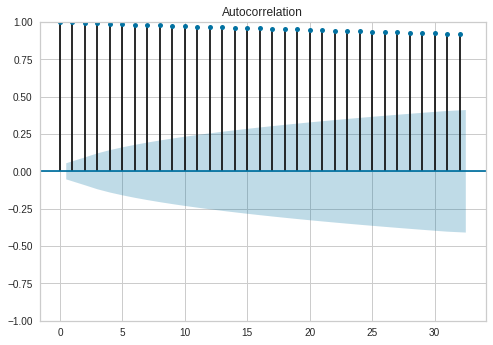

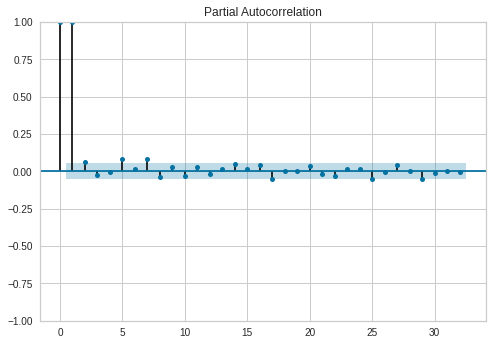

In [74]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(mastercarddf["Adj Close"])
pacf = sgt.plot_pacf(mastercarddf["Adj Close"])

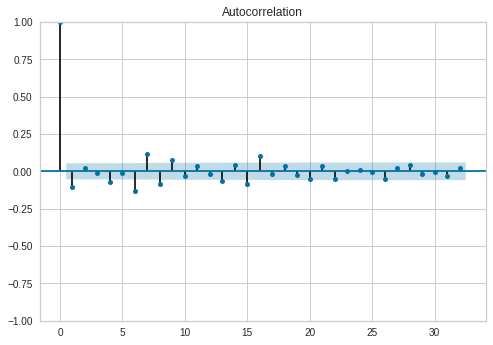

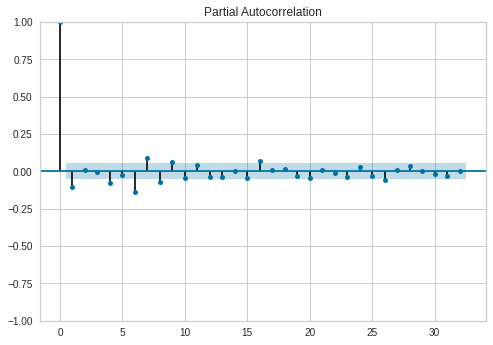

In [75]:
# plot acf and pacf
import statsmodels.graphics.tsaplots as sgt
acf = sgt.plot_acf(mastercarddf["Return"])
pacf = sgt.plot_pacf(mastercarddf["Return"])

In [76]:
# normal transformation
box_data, box_lambda = ss.boxcox(mastercarddf["Adj Close"])
yeo_data, yeo_lambda = ss.yeojohnson(mastercarddf["Return"])

print(f"old adjusted close skew: {ss.skew(mastercarddf['Adj Close'])} old kurtosis: {ss.kurtosis(mastercarddf['Adj Close'])}")
print(f"old return skew: {ss.skew(mastercarddf['Return'])} old kurtosis: {ss.kurtosis(mastercarddf['Return'])}")
print(f"box skew: {ss.skew(box_data)} old kurtosis: {ss.kurtosis(box_data)}")
print(f"yeo skew: {ss.skew(yeo_data)} old kurtosis: {ss.kurtosis(yeo_data)}")

old adjusted close skew: -0.1523069726267518 old kurtosis: -1.300550005529881
old return skew: 0.01853414096098117 old kurtosis: 9.130901012988732
box skew: -0.1686939872429822 old kurtosis: -1.2918589470919568
yeo skew: 0.007051518955259543 old kurtosis: 9.113789487145944


In [77]:
# Tests of Normality
import scipy.stats as ss

# Jarque–Bera Test
statistic = ss.jarque_bera(box_data)
print("JarqueBeraTest", statistic)

# Anderson-Darling Normality Test
statistic = ss.anderson(box_data)
print(statistic)

# Kolmogorov-Smirnov Test
statistic = ss.kstest(box_data, 'norm')
print(statistic)

# Shapiro-Wilk Test
statistic, pvalue = ss.shapiro(box_data)
print("ShapiroWilkTest", statistic, pvalue)

JarqueBeraTest (98.124440572365, 0.0)
AndersonResult(statistic=25.16709205901543, critical_values=array([0.574, 0.654, 0.785, 0.915, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroWilkTest 0.9349893927574158 1.4704955763554955e-23


In [29]:
# import pmdarima as pmd
# model = pmd.auto_arima(rildf["Return"], max_p=10, max_q=10, max_d=3, max_order=20)
# model.summary()
# import pmdarima as pmd
# yeo_model = pmd.auto_arima(yeo_data, max_p=10, max_q=10, max_d=3, max_order=20)
# yeo_model.summary()
# import pmdarima as pmd
# box_model = pmd.auto_arima(box_data, max_p=10, max_q=10, max_d=3, max_order=20)
# box_model.summary()
# model.predict(n_periods=10)
# infy_df.reset_index(inplace=True)

In [30]:
# cutoff_date = '2021-12-31'
# xtrain, xtest = amexdf.loc[amexdf.index <= cutoff_date], amexdf.loc[amexdf.index > cutoff_date]

In [78]:
import pmdarima as pmd

maxlen = len(mastercarddf)
forecast1 = []

for ii in range(30):
  train_model = pmd.auto_arima(mastercarddf[ii:ii+maxlen-30]["Adj Close"], max_p=5, max_q=5, max_d=2, max_order=11)
  train_model.fit(mastercarddf[ii:ii+maxlen-30]["Adj Close"])
  forecast1.append(train_model.predict(n_periods=1).item())


ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

ARIMA(maxiter=50, method='lbfgs', order=(4, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [79]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(mastercarddf[-30:]["Adj Close"], forecast1, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=7.66


In [33]:
# import pmdarima as pmd
# train_model = pmd.auto_arima(amexdf[:-30]["Adj Close"], max_p=10, max_q=10, max_d=3, max_order=20)
# train_model.fit(amexdf[:-30]["Adj Close"])
# train_model.summary()

In [34]:
# forecast1 = train_model.predict(n_periods=30)

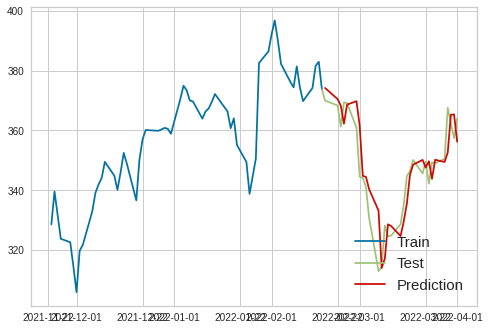

In [80]:
forecast1 = pd.DataFrame(forecast1, index = mastercarddf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(mastercarddf[-90:-30]["Adj Close"], label="Train")
plt.plot(mastercarddf[-31:]["Adj Close"], label="Test")
plt.plot(forecast1, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# xresiduals = xtest["Return"].values - forecast["Prediction"].values

In [ ]:
# _ = sgt.plot_acf(xresiduals, lags=15)
# _ = sgt.plot_pacf(xresiduals, lags=15)


In [ ]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit1 = ExponentialSmoothing(xtrain["Adj Close"], seasonal_periods=52, trend='mul', seasonal='mul')
# fit1 = fit1.fit()
# prediction = fit1.forecast(len(xtest)).copy()
# xresiduals = xtest["Adj Close"].values - prediction

In [ ]:
# # fit1.params_formatted
# xtest.shape[0]/xtrain.shape[0]

In [ ]:
# sgt.plot_acf(xresiduals, lags=15);
# sgt.plot_pacf(xresiduals, lags=15);

In [ ]:
# prediction = pd.DataFrame(prediction.values, index = xtest.index, columns=['Prediction'])

In [ ]:
# plt.plot(xtrain["Adj Close"], label="Train")
# plt.plot(xtest["Adj Close"], label="Test")
# plt.plot(prediction, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

In [ ]:
# from sklearn.metrics import mean_squared_error

# rmse = mean_squared_error(xtest["Return"], forecast["Prediction"], squared=False)
# print(f"RMSE={rmse*100:.4f}%")

# 2. VAR

In [81]:
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [82]:
mastercarddf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280403,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250916,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048355,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581009,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679935,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650730,3300


In [83]:
masterdf = pd.concat([mastercarddf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["mastercard price", "amazon price", "euro price", "treasury price", "inflation price"]
masterdf

,mastercard price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,269.648895,1788.199951,0.903310,1.926,23.581009
2019-11-08,271.724731,1785.880005,0.907466,1.933,23.679935
2019-11-11,273.810425,1771.650024,0.907240,1.943,23.650730
2019-11-12,273.948822,1778.000000,0.906170,1.909,23.698776
2019-11-13,274.868134,1753.109985,0.908070,1.870,23.698776
...,...,...,...,...,...
2022-03-29,367.549988,3386.300049,0.909600,2.400,34.779999
2022-03-30,362.239990,3326.020020,0.901590,2.358,34.549999
2022-03-31,357.380005,3259.949951,0.895910,2.327,34.000000


In [84]:
from statsmodels.tsa.vector_ar.var_model import VAR

maxlen = len(masterdf)
forecast2 = []

for ii in range(30):
  df = masterdf[ii:ii+maxlen-30]
  train_model = VAR(df)
  result = train_model.select_order(maxlags=10)
  result = train_model.fit(maxlags=result.aic)
  lagged_Values = df.values[-result.k_ar:]
  forecast2.append(result.forecast(y=lagged_Values, steps=1)[0][0])

In [85]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(masterdf[-30:]["mastercard price"], forecast2, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=7.50


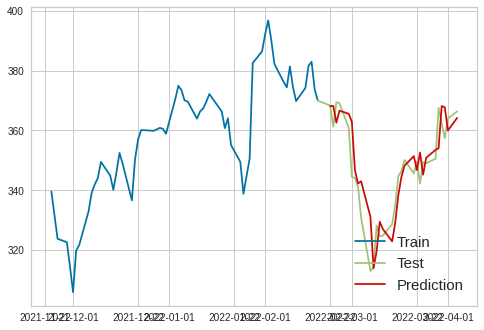

In [86]:
forecast2 = pd.DataFrame(forecast2, index = mastercarddf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(mastercarddf[-90:-30]["Adj Close"], label="Train")
plt.plot(mastercarddf[-31:]["Adj Close"], label="Test")
plt.plot(forecast2, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

In [ ]:
# from statsmodels.tsa.vector_ar.var_model import VAR

# # masterdf = np.log(masterdf).diff(1).dropna()
# # masterdf
# model = VAR(masterdf[:-30])
# result = model.select_order(maxlags=10)
# result.summary()
# result = model.fit(maxlags=result.aic)
# # result.summary()
# lagged_Values = masterdf.values[-result.k_ar:]

# forecast2 = result.forecast(y=lagged_Values, steps=30) 
# forecast2 = pd.DataFrame(forecast2[:,0], index = amexdf[-30:]["Adj Close"].index, columns=['Prediction'])

# plt.plot(amexdf[-90:-29]["Adj Close"], label="Train")
# plt.plot(amexdf[-30:]["Adj Close"], label="Test")
# plt.plot(forecast2, label="Prediction")
# plt.legend(loc='lower right', fontsize=15)
# plt.show()

# 3. Deep Learning - LSTM

In [87]:
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
mastercarddf["Return"] = np.log(mastercarddf["Adj Close"]) - np.log(mastercarddf["Adj Close"].shift(1))
mastercarddf.dropna(inplace=True)
mastercarddf.head(3)

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250900,3299000,0.009444
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048370,3262200,0.007694
2017-01-06,107.320000,108.110001,106.870003,107.760002,104.797211,3044600,0.007171


In [88]:
import torch

def sliding_window(ts, window_size=10):
  X = []
  Y = []
  ts = ts.tolist()

  for ii in range(window_size+1, len(ts)+1):
    X.append(ts[ii-(window_size+1):ii-1])
    Y.append(ts[ii-1])

  return torch.Tensor(X), torch.Tensor(Y)

In [89]:
xtrain, ytrain = sliding_window(mastercarddf["Adj Close"])

In [90]:
ytrain

tensor([105.5460, 106.9367, 106.6158,  ..., 357.3800, 363.9700, 366.2900])

In [91]:
import torch
import torch.nn as nn

class GRU(nn.Module):
  def __init__(self, hidden_size, in_size=1, out_size=1):
    super(GRU, self).__init__()
    self.hidden_size = hidden_size
    self.gru = nn.GRU(
        input_size = in_size,
        hidden_size = hidden_size,
        batch_first = True
    )
    self.fc = nn.Linear(hidden_size, out_size)

  def forward(self, x, h):
    # h = torch.zeros(1, x.size(0), self.hidden_size)
    out, _ = self.gru(x, h)
    last_hidden_states = out[:, -1]
    out = self.fc(last_hidden_states)
    return out, last_hidden_states 

  def init_state(self, batch_size):
    hidden = next(self.parameters()).data.new(batch_size, self.hidden_size).zero_()
    return hidden


In [92]:
hidden_size = 1024
learning_rate = 0.95
epochs = 1000

In [ ]:
# model = GRU(hidden_size = hidden_size)
# model.cuda()
# model.train()
# criterion = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
# losses = []
# hidden = model.init_state(xtrain.size(0)-1)
# hidden.cuda()
# epochs = 1000
# input = xtrain[:-1,:].unsqueeze(2)
# input = input.cuda()
# target = ytrain[:-1]
# target = target.cuda()

# for ii in range(1, epochs+1):
#   hidden = hidden.data.unsqueeze(0)
#   pred, hidden = model(input, hidden)
#   # print(f"prediction: {pred.squeeze()}", f"actual: {ytrain[:-1]}")
#   loss = criterion(target, pred.squeeze())
#   optimizer.zero_grad()
#   loss.backward()
#   optimizer.step()
#   losses.append(loss.item())
#   # print(f"losses: {losses}")

#   if (ii%50 == 0):
#     print(f"epoch: {ii}... loss: {losses[-1]}")
# forecast3 = []

# model.eval()
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
#   forecast3.append(pred)

# forecast3

In [ ]:
# model.eval()
# xtrain[-1, :].shape
# with torch.no_grad():
#   pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
# xtrain[-1:, :].unsqueeze(2).shape
# hidden[-1:, :].unsqueeze(0).shape
# pred

In [99]:
import copy

maxlen = len(mastercarddf)
trainlist = []
forecast3 = []

for ii in range(30):
  model = GRU(hidden_size = hidden_size)
  model.cuda()
  criterion = torch.nn.MSELoss()
  optimizer = torch.optim.Adam(params = model.parameters(), lr = learning_rate)
  xtrain, ytrain = sliding_window(mastercarddf[ii:ii+maxlen-30+1]["Adj Close"])
  xtrain, ytrain = xtrain.cuda(), ytrain.cuda()

  losses = []
  hidden = model.init_state(xtrain.size(0)-1)

  model.train()

  for ii in range(1, epochs+1):
    hidden = hidden.data.unsqueeze(0)
    pred, hidden = model(xtrain[:-1, :].unsqueeze(2), hidden)
    loss = criterion(ytrain[:-1], pred.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (ii%50 == 0):
        print(f"epoch: {ii}... loss: {losses[-1]}")

  model.eval()
  with torch.no_grad():
    pred, hidden = model(xtrain[-1:, :].unsqueeze(2), hidden[-1:, :].unsqueeze(0))
    trainlist.append(copy.deepcopy(xtrain[-1:, :]))
    forecast3.append(pred)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 764.1282348632812
epoch: 100... loss: 118.68421173095703
epoch: 150... loss: 98.33169555664062
epoch: 200... loss: 86.88966369628906
epoch: 250... loss: 76.73915100097656
epoch: 300... loss: 68.24229431152344
epoch: 350... loss: 61.456268310546875
epoch: 400... loss: 56.23882293701172
epoch: 450... loss: 52.34546661376953
epoch: 500... loss: 49.499794006347656
epoch: 550... loss: 47.439083099365234
epoch: 600... loss: 45.93853759765625
epoch: 650... loss: 44.82024383544922
epoch: 700... loss: 43.952064514160156
epoch: 750... loss: 114.81790924072266
epoch: 800... loss: 59.01823425292969
epoch: 850... loss: 43.180259704589844
epoch: 900... loss: 41.81547927856445
epoch: 950... loss: 41.3784294128418
epoch: 1000... loss: 40.95914840698242


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 787.7124633789062
epoch: 100... loss: 80.34532165527344
epoch: 150... loss: 73.38678741455078
epoch: 200... loss: 68.56535339355469
epoch: 250... loss: 64.4515151977539
epoch: 300... loss: 60.97135925292969
epoch: 350... loss: 57.985958099365234
epoch: 400... loss: 55.36526107788086
epoch: 450... loss: 53.015869140625
epoch: 500... loss: 50.880401611328125
epoch: 550... loss: 48.92630386352539
epoch: 600... loss: 47.13499069213867
epoch: 650... loss: 45.49416732788086
epoch: 700... loss: 43.99382019042969
epoch: 750... loss: 42.6246452331543
epoch: 800... loss: 71.58770751953125
epoch: 850... loss: 50.76245880126953
epoch: 900... loss: 39.68666076660156
epoch: 950... loss: 38.88825988769531
epoch: 1000... loss: 38.144535064697266


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 874.854736328125
epoch: 100... loss: 98.0849838256836
epoch: 150... loss: 81.73294830322266
epoch: 200... loss: 74.57791900634766
epoch: 250... loss: 67.75504302978516
epoch: 300... loss: 61.556846618652344
epoch: 350... loss: 56.13946533203125
epoch: 400... loss: 51.551212310791016
epoch: 450... loss: 47.76533126831055
epoch: 500... loss: 44.707611083984375
epoch: 550... loss: 42.2790412902832
epoch: 600... loss: 40.37277603149414
epoch: 650... loss: 38.88570022583008
epoch: 700... loss: 37.72547149658203
epoch: 750... loss: 36.81401062011719
epoch: 800... loss: 152.8003387451172
epoch: 850... loss: 36.42953109741211
epoch: 900... loss: 35.334014892578125
epoch: 950... loss: 34.835670471191406
epoch: 1000... loss: 34.50533676147461


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 787.8533325195312
epoch: 100... loss: 113.70608520507812
epoch: 150... loss: 90.14397430419922
epoch: 200... loss: 81.04167938232422
epoch: 250... loss: 72.67283630371094
epoch: 300... loss: 65.3521728515625
epoch: 350... loss: 59.213924407958984
epoch: 400... loss: 54.24067687988281
epoch: 450... loss: 50.32107162475586
epoch: 500... loss: 47.29591369628906
epoch: 550... loss: 44.99205780029297
epoch: 600... loss: 43.244964599609375
epoch: 650... loss: 41.911285400390625
epoch: 700... loss: 40.87421417236328
epoch: 750... loss: 40.04353713989258
epoch: 800... loss: 40.70047378540039
epoch: 850... loss: 472.0606384277344
epoch: 900... loss: 41.08596420288086
epoch: 950... loss: 37.98636245727539
epoch: 1000... loss: 37.59551239013672


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 357.9971618652344
epoch: 100... loss: 90.4788818359375
epoch: 150... loss: 77.7179183959961
epoch: 200... loss: 68.1974105834961
epoch: 250... loss: 60.009544372558594
epoch: 300... loss: 53.37738800048828
epoch: 350... loss: 48.25899887084961
epoch: 400... loss: 44.453487396240234
epoch: 450... loss: 41.69715118408203
epoch: 500... loss: 39.7263298034668
epoch: 550... loss: 38.312400817871094
epoch: 600... loss: 37.275177001953125
epoch: 650... loss: 36.48320007324219
epoch: 700... loss: 17499.1953125
epoch: 750... loss: 129.9813232421875
epoch: 800... loss: 35.704647064208984
epoch: 850... loss: 34.641212463378906
epoch: 900... loss: 34.29098892211914
epoch: 950... loss: 33.9622917175293
epoch: 1000... loss: 33.65129470825195


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 654.025634765625
epoch: 100... loss: 176.99081420898438
epoch: 150... loss: 140.0157012939453
epoch: 200... loss: 113.7815170288086
epoch: 250... loss: 94.12528991699219
epoch: 300... loss: 80.4351577758789
epoch: 350... loss: 71.36261749267578
epoch: 400... loss: 65.49463653564453
epoch: 450... loss: 61.67555618286133
epoch: 500... loss: 59.089515686035156
epoch: 550... loss: 57.21870040893555
epoch: 600... loss: 55.76044464111328
epoch: 650... loss: 54.54801940917969
epoch: 700... loss: 53.4924430847168
epoch: 750... loss: 187.5972900390625
epoch: 800... loss: 71.6489028930664
epoch: 850... loss: 51.24480056762695
epoch: 900... loss: 50.6060905456543
epoch: 950... loss: 50.01300048828125
epoch: 1000... loss: 49.44207763671875


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 605.0961303710938
epoch: 100... loss: 135.5279541015625
epoch: 150... loss: 115.57939147949219
epoch: 200... loss: 102.24134826660156
epoch: 250... loss: 90.55558013916016
epoch: 300... loss: 80.91154479980469
epoch: 350... loss: 73.31763458251953
epoch: 400... loss: 67.55288696289062
epoch: 450... loss: 63.290645599365234
epoch: 500... loss: 60.184452056884766
epoch: 550... loss: 57.9193229675293
epoch: 600... loss: 56.236507415771484
epoch: 650... loss: 54.93881607055664
epoch: 700... loss: 961.8821411132812
epoch: 750... loss: 53.836673736572266
epoch: 800... loss: 52.728458404541016
epoch: 850... loss: 51.962398529052734
epoch: 900... loss: 51.3655891418457
epoch: 950... loss: 50.78300476074219
epoch: 1000... loss: 50.211402893066406


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1010.4228515625
epoch: 100... loss: 139.0694122314453
epoch: 150... loss: 100.26364135742188
epoch: 200... loss: 90.50489807128906
epoch: 250... loss: 81.943359375
epoch: 300... loss: 74.34383392333984
epoch: 350... loss: 67.86280059814453
epoch: 400... loss: 62.50997543334961
epoch: 450... loss: 58.19951629638672
epoch: 500... loss: 54.79289627075195
epoch: 550... loss: 52.13156509399414
epoch: 600... loss: 50.05918502807617
epoch: 650... loss: 48.43537521362305
epoch: 700... loss: 47.14220428466797
epoch: 750... loss: 46.085960388183594
epoch: 800... loss: 45.195621490478516
epoch: 850... loss: 44.41933822631836
epoch: 900... loss: 43.72087860107422
epoch: 950... loss: 43.07588577270508
epoch: 1000... loss: 336.54052734375


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 620.2167358398438
epoch: 100... loss: 128.5746612548828
epoch: 150... loss: 110.04413604736328
epoch: 200... loss: 97.82205200195312
epoch: 250... loss: 86.76895904541016
epoch: 300... loss: 77.326904296875
epoch: 350... loss: 69.61685943603516
epoch: 400... loss: 63.547752380371094
epoch: 450... loss: 58.908626556396484
epoch: 500... loss: 55.438133239746094
epoch: 550... loss: 52.873104095458984
epoch: 600... loss: 50.97724914550781
epoch: 650... loss: 49.55502700805664
epoch: 700... loss: 48.4546012878418
epoch: 750... loss: 47.56427764892578
epoch: 800... loss: 46.80634689331055
epoch: 850... loss: 1638.65234375
epoch: 900... loss: 47.8856086730957
epoch: 950... loss: 45.26728820800781
epoch: 1000... loss: 44.73180389404297


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 693.588623046875
epoch: 100... loss: 143.2136993408203
epoch: 150... loss: 121.02941131591797
epoch: 200... loss: 107.45508575439453
epoch: 250... loss: 95.43396759033203
epoch: 300... loss: 85.3930892944336
epoch: 350... loss: 77.38152313232422
epoch: 400... loss: 71.21431732177734
epoch: 450... loss: 66.59032440185547
epoch: 500... loss: 63.17698287963867
epoch: 550... loss: 60.662960052490234
epoch: 600... loss: 58.78566360473633
epoch: 650... loss: 57.34003448486328
epoch: 700... loss: 56.175621032714844
epoch: 750... loss: 55.18810272216797
epoch: 800... loss: 54.309837341308594
epoch: 850... loss: 222.1654815673828
epoch: 900... loss: 53.08979034423828
epoch: 950... loss: 52.321983337402344
epoch: 1000... loss: 51.6919059753418


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 630.4630126953125
epoch: 100... loss: 137.08253479003906
epoch: 150... loss: 103.72746276855469
epoch: 200... loss: 93.09172058105469
epoch: 250... loss: 83.52789306640625
epoch: 300... loss: 75.09260559082031
epoch: 350... loss: 67.95684051513672
epoch: 400... loss: 62.12217330932617
epoch: 450... loss: 57.481449127197266
epoch: 500... loss: 53.86874771118164
epoch: 550... loss: 51.0969352722168
epoch: 600... loss: 48.98334884643555
epoch: 650... loss: 47.36518096923828
epoch: 700... loss: 46.106876373291016
epoch: 750... loss: 45.1015510559082
epoch: 800... loss: 44.268978118896484
epoch: 850... loss: 133.82485961914062
epoch: 900... loss: 78.4505615234375
epoch: 950... loss: 42.600589752197266
epoch: 1000... loss: 42.12546157836914


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 363.2057189941406
epoch: 100... loss: 113.71360778808594
epoch: 150... loss: 94.00127410888672
epoch: 200... loss: 84.26495361328125
epoch: 250... loss: 75.68335723876953
epoch: 300... loss: 68.21825408935547
epoch: 350... loss: 61.88473129272461
epoch: 400... loss: 56.660133361816406
epoch: 450... loss: 52.45895004272461
epoch: 500... loss: 49.149314880371094
epoch: 550... loss: 46.578765869140625
epoch: 600... loss: 44.595027923583984
epoch: 650... loss: 43.06005096435547
epoch: 700... loss: 41.85666275024414
epoch: 750... loss: 40.89093780517578
epoch: 800... loss: 40.09115982055664
epoch: 850... loss: 1023.451416015625
epoch: 900... loss: 47.15415954589844
epoch: 950... loss: 39.477928161621094
epoch: 1000... loss: 37.94845199584961


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 787.5901489257812
epoch: 100... loss: 118.3203125
epoch: 150... loss: 93.75177764892578
epoch: 200... loss: 86.54737854003906
epoch: 250... loss: 79.65544128417969
epoch: 300... loss: 73.23399353027344
epoch: 350... loss: 67.46114349365234
epoch: 400... loss: 62.41869354248047
epoch: 450... loss: 58.11688995361328
epoch: 500... loss: 54.51605224609375
epoch: 550... loss: 51.5456428527832
epoch: 600... loss: 49.119258880615234
epoch: 650... loss: 47.14621353149414
epoch: 700... loss: 45.53961181640625
epoch: 750... loss: 515.9221801757812
epoch: 800... loss: 166.6737823486328
epoch: 850... loss: 43.102542877197266
epoch: 900... loss: 41.828643798828125
epoch: 950... loss: 41.201725006103516
epoch: 1000... loss: 40.62689208984375


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 793.9996948242188
epoch: 100... loss: 120.85236358642578
epoch: 150... loss: 98.68619537353516
epoch: 200... loss: 89.95453643798828
epoch: 250... loss: 81.70384216308594
epoch: 300... loss: 74.2430648803711
epoch: 350... loss: 67.75431823730469
epoch: 400... loss: 62.2861442565918
epoch: 450... loss: 57.794986724853516
epoch: 500... loss: 54.1800537109375
epoch: 550... loss: 51.31208419799805
epoch: 600... loss: 49.054264068603516
epoch: 650... loss: 47.276527404785156
epoch: 700... loss: 45.86406707763672
epoch: 750... loss: 131.29388427734375
epoch: 800... loss: 229.91531372070312
epoch: 850... loss: 43.618900299072266
epoch: 900... loss: 42.65001678466797
epoch: 950... loss: 42.08485412597656
epoch: 1000... loss: 41.55860137939453


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 875.473876953125
epoch: 100... loss: 145.45655822753906
epoch: 150... loss: 122.5300521850586
epoch: 200... loss: 107.47935485839844
epoch: 250... loss: 94.2895278930664
epoch: 300... loss: 83.34746551513672
epoch: 350... loss: 74.6487045288086
epoch: 400... loss: 67.95647430419922
epoch: 450... loss: 62.931148529052734
epoch: 500... loss: 59.21465301513672
epoch: 550... loss: 56.478580474853516
epoch: 600... loss: 54.44728088378906
epoch: 650... loss: 52.90367889404297
epoch: 700... loss: 51.68582534790039
epoch: 750... loss: 50.67847442626953
epoch: 800... loss: 15265.056640625
epoch: 850... loss: 60.908870697021484
epoch: 900... loss: 48.96456527709961
epoch: 950... loss: 47.95909118652344
epoch: 1000... loss: 47.380489349365234


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 863.3887329101562
epoch: 100... loss: 117.18476867675781
epoch: 150... loss: 99.347412109375
epoch: 200... loss: 90.9543685913086
epoch: 250... loss: 83.02568054199219
epoch: 300... loss: 75.87989044189453
epoch: 350... loss: 69.68307495117188
epoch: 400... loss: 64.4712905883789
epoch: 450... loss: 60.19236373901367
epoch: 500... loss: 56.7414665222168
epoch: 550... loss: 53.98881912231445
epoch: 600... loss: 51.80036163330078
epoch: 650... loss: 50.05084991455078
epoch: 700... loss: 48.631683349609375
epoch: 750... loss: 47.70315933227539
epoch: 800... loss: 267.6325988769531
epoch: 850... loss: 49.490848541259766
epoch: 900... loss: 45.09206008911133
epoch: 950... loss: 44.42871856689453
epoch: 1000... loss: 43.8031120300293


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 867.57275390625
epoch: 100... loss: 131.13282775878906
epoch: 150... loss: 107.12625885009766
epoch: 200... loss: 98.4540023803711
epoch: 250... loss: 91.25938415527344
epoch: 300... loss: 85.51927185058594
epoch: 350... loss: 81.00154113769531
epoch: 400... loss: 77.40422821044922
epoch: 450... loss: 74.44978332519531
epoch: 500... loss: 71.9241943359375
epoch: 550... loss: 69.68150329589844
epoch: 600... loss: 67.63177490234375
epoch: 650... loss: 65.72428131103516
epoch: 700... loss: 63.932674407958984
epoch: 750... loss: 62.24390411376953
epoch: 800... loss: 77.80733489990234
epoch: 850... loss: 181.40773010253906
epoch: 900... loss: 60.05986022949219
epoch: 950... loss: 57.1538200378418
epoch: 1000... loss: 56.105133056640625


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 898.4475708007812
epoch: 100... loss: 130.5902862548828
epoch: 150... loss: 106.76199340820312
epoch: 200... loss: 94.21952056884766
epoch: 250... loss: 83.07457733154297
epoch: 300... loss: 73.71310424804688
epoch: 350... loss: 66.2053451538086
epoch: 400... loss: 60.403926849365234
epoch: 450... loss: 56.04829406738281
epoch: 500... loss: 52.84116744995117
epoch: 550... loss: 50.49820327758789
epoch: 600... loss: 48.77503967285156
epoch: 650... loss: 47.47740173339844
epoch: 700... loss: 46.460289001464844
epoch: 750... loss: 46.03205871582031
epoch: 800... loss: 231.42994689941406
epoch: 850... loss: 47.00508499145508
epoch: 900... loss: 43.94316864013672
epoch: 950... loss: 43.44818878173828
epoch: 1000... loss: 42.967041015625


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 701.8677978515625
epoch: 100... loss: 145.30238342285156
epoch: 150... loss: 100.88584899902344
epoch: 200... loss: 90.44660186767578
epoch: 250... loss: 82.33414459228516
epoch: 300... loss: 75.98045349121094
epoch: 350... loss: 71.21551513671875
epoch: 400... loss: 67.73371887207031
epoch: 450... loss: 65.20504760742188
epoch: 500... loss: 63.337791442871094
epoch: 550... loss: 61.90382385253906
epoch: 600... loss: 60.740238189697266
epoch: 650... loss: 59.73905563354492
epoch: 700... loss: 58.83311462402344
epoch: 750... loss: 57.983131408691406
epoch: 800... loss: 57.16712951660156
epoch: 850... loss: 56.373512268066406
epoch: 900... loss: 4234.0634765625
epoch: 950... loss: 64.16383361816406
epoch: 1000... loss: 54.51637268066406


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 626.3492431640625
epoch: 100... loss: 152.61868286132812
epoch: 150... loss: 111.81961822509766
epoch: 200... loss: 100.73309326171875
epoch: 250... loss: 90.88790893554688
epoch: 300... loss: 82.13591003417969
epoch: 350... loss: 74.63922119140625
epoch: 400... loss: 68.3944091796875
epoch: 450... loss: 63.29545974731445
epoch: 500... loss: 59.18387985229492
epoch: 550... loss: 55.88468933105469
epoch: 600... loss: 53.23059844970703
epoch: 650... loss: 51.07510757446289
epoch: 700... loss: 49.29789352416992
epoch: 750... loss: 47.8049201965332
epoch: 800... loss: 46.52552032470703
epoch: 850... loss: 771.1270141601562
epoch: 900... loss: 67.51639556884766
epoch: 950... loss: 43.99085235595703
epoch: 1000... loss: 43.22930145263672


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 814.9369506835938
epoch: 100... loss: 121.06678009033203
epoch: 150... loss: 100.5776138305664
epoch: 200... loss: 89.47594451904297
epoch: 250... loss: 79.29460906982422
epoch: 300... loss: 70.4371109008789
epoch: 350... loss: 63.0513801574707
epoch: 400... loss: 57.09905242919922
epoch: 450... loss: 52.429420471191406
epoch: 500... loss: 48.83772277832031
epoch: 550... loss: 46.10715103149414
epoch: 600... loss: 44.03561782836914
epoch: 650... loss: 42.45018005371094
epoch: 700... loss: 41.21208190917969
epoch: 750... loss: 40.21601486206055
epoch: 800... loss: 397.8624572753906
epoch: 850... loss: 105.92192077636719
epoch: 900... loss: 38.43179702758789
epoch: 950... loss: 37.76074981689453
epoch: 1000... loss: 37.28852081298828


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 531.4891967773438
epoch: 100... loss: 153.84857177734375
epoch: 150... loss: 125.18830108642578
epoch: 200... loss: 114.09031677246094
epoch: 250... loss: 103.91426849365234
epoch: 300... loss: 94.96453094482422
epoch: 350... loss: 87.34011840820312
epoch: 400... loss: 80.977783203125
epoch: 450... loss: 75.72866821289062
epoch: 500... loss: 71.41322326660156
epoch: 550... loss: 67.85513305664062
epoch: 600... loss: 64.89930725097656
epoch: 650... loss: 62.41826629638672
epoch: 700... loss: 60.31142807006836
epoch: 750... loss: 58.501304626464844
epoch: 800... loss: 56.9285774230957
epoch: 850... loss: 55.5860710144043
epoch: 900... loss: 870.3714599609375
epoch: 950... loss: 54.730960845947266
epoch: 1000... loss: 52.73720169067383


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 923.7094116210938
epoch: 100... loss: 102.96916198730469
epoch: 150... loss: 87.11908721923828
epoch: 200... loss: 83.1097183227539
epoch: 250... loss: 79.09252166748047
epoch: 300... loss: 75.17085266113281
epoch: 350... loss: 71.43846130371094
epoch: 400... loss: 67.96110534667969
epoch: 450... loss: 64.77887725830078
epoch: 500... loss: 61.90932083129883
epoch: 550... loss: 59.3516731262207
epoch: 600... loss: 57.09151840209961
epoch: 650... loss: 55.105220794677734
epoch: 700... loss: 53.36357879638672
epoch: 750... loss: 51.835140228271484
epoch: 800... loss: 54.314327239990234
epoch: 850... loss: 78.02005004882812
epoch: 900... loss: 48.94852828979492
epoch: 950... loss: 47.64055633544922
epoch: 1000... loss: 46.827186584472656


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 460.7276611328125
epoch: 100... loss: 96.75225830078125
epoch: 150... loss: 85.47325897216797
epoch: 200... loss: 80.56820678710938
epoch: 250... loss: 76.01007843017578
epoch: 300... loss: 71.74955749511719
epoch: 350... loss: 67.74246978759766
epoch: 400... loss: 63.968528747558594
epoch: 450... loss: 60.43099594116211
epoch: 500... loss: 57.143890380859375
epoch: 550... loss: 54.121185302734375
epoch: 600... loss: 51.370819091796875
epoch: 650... loss: 48.892784118652344
epoch: 700... loss: 46.679718017578125
epoch: 750... loss: 44.718292236328125
epoch: 800... loss: 42.990840911865234
epoch: 850... loss: 5154.30126953125
epoch: 900... loss: 49.45650863647461
epoch: 950... loss: 39.507320404052734
epoch: 1000... loss: 38.426300048828125


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 691.647216796875
epoch: 100... loss: 76.47767639160156
epoch: 150... loss: 71.2915267944336
epoch: 200... loss: 69.58086395263672
epoch: 250... loss: 67.7839126586914
epoch: 300... loss: 65.92192840576172
epoch: 350... loss: 64.0345458984375
epoch: 400... loss: 62.15493392944336
epoch: 450... loss: 60.30997085571289
epoch: 500... loss: 58.5205192565918
epoch: 550... loss: 56.80210494995117
epoch: 600... loss: 55.16545104980469
epoch: 650... loss: 53.617225646972656
epoch: 700... loss: 52.16062545776367
epoch: 750... loss: 50.7960090637207
epoch: 800... loss: 16973.912109375
epoch: 850... loss: 51.27745819091797
epoch: 900... loss: 48.0941047668457
epoch: 950... loss: 46.78801727294922
epoch: 1000... loss: 45.970672607421875


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 910.2392578125
epoch: 100... loss: 133.27610778808594
epoch: 150... loss: 105.4992446899414
epoch: 200... loss: 96.45198822021484
epoch: 250... loss: 87.85125732421875
epoch: 300... loss: 79.9863510131836
epoch: 350... loss: 73.06230163574219
epoch: 400... loss: 67.15213012695312
epoch: 450... loss: 62.2342414855957
epoch: 500... loss: 58.22552490234375
epoch: 550... loss: 55.00848388671875
epoch: 600... loss: 52.452449798583984
epoch: 650... loss: 50.42831802368164
epoch: 700... loss: 48.81833267211914
epoch: 750... loss: 47.52138900756836
epoch: 800... loss: 497.7939147949219
epoch: 850... loss: 165.53553771972656
epoch: 900... loss: 45.821407318115234
epoch: 950... loss: 44.483642578125
epoch: 1000... loss: 43.93579864501953


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 1219.631591796875
epoch: 100... loss: 162.8114013671875
epoch: 150... loss: 114.56494140625
epoch: 200... loss: 105.64635467529297
epoch: 250... loss: 98.02251434326172
epoch: 300... loss: 90.70985412597656
epoch: 350... loss: 83.91616821289062
epoch: 400... loss: 77.77201080322266
epoch: 450... loss: 72.33860778808594
epoch: 500... loss: 67.62399291992188
epoch: 550... loss: 63.59724807739258
epoch: 600... loss: 60.201576232910156
epoch: 650... loss: 57.36478805541992
epoch: 700... loss: 55.00825881958008
epoch: 750... loss: 53.053287506103516
epoch: 800... loss: 51.42594528198242
epoch: 850... loss: 50.059814453125
epoch: 900... loss: 48.89751052856445
epoch: 950... loss: 3147.8017578125
epoch: 1000... loss: 70.82260131835938


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 699.1575927734375
epoch: 100... loss: 105.40828704833984
epoch: 150... loss: 86.76521301269531
epoch: 200... loss: 79.97687530517578
epoch: 250... loss: 74.29795837402344
epoch: 300... loss: 69.7195053100586
epoch: 350... loss: 66.06865692138672
epoch: 400... loss: 63.122257232666016
epoch: 450... loss: 60.677005767822266
epoch: 500... loss: 58.577239990234375
epoch: 550... loss: 56.71707534790039
epoch: 600... loss: 55.03045654296875
epoch: 650... loss: 53.47872543334961
epoch: 700... loss: 52.039695739746094
epoch: 750... loss: 50.70005798339844
epoch: 800... loss: 49.45850372314453
epoch: 850... loss: 1154.812255859375
epoch: 900... loss: 48.35700988769531
epoch: 950... loss: 46.76713562011719
epoch: 1000... loss: 45.9527473449707


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 966.6043090820312
epoch: 100... loss: 133.40066528320312
epoch: 150... loss: 105.43145751953125
epoch: 200... loss: 94.04241180419922
epoch: 250... loss: 83.78523254394531
epoch: 300... loss: 74.98004913330078
epoch: 350... loss: 67.74147033691406
epoch: 400... loss: 61.99081039428711
epoch: 450... loss: 57.53935623168945
epoch: 500... loss: 54.152008056640625
epoch: 550... loss: 51.59135055541992
epoch: 600... loss: 49.64398956298828
epoch: 650... loss: 48.13330078125
epoch: 700... loss: 46.92217254638672
epoch: 750... loss: 45.916725158691406
epoch: 800... loss: 69.63831329345703
epoch: 850... loss: 44.82090377807617
epoch: 900... loss: 43.795448303222656
epoch: 950... loss: 43.17979049682617
epoch: 1000... loss: 42.58539962768555


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

epoch: 50... loss: 876.2188110351562
epoch: 100... loss: 96.87569427490234
epoch: 150... loss: 81.53704833984375
epoch: 200... loss: 74.662841796875
epoch: 250... loss: 68.67694854736328
epoch: 300... loss: 63.72506332397461
epoch: 350... loss: 59.757362365722656
epoch: 400... loss: 56.623512268066406
epoch: 450... loss: 54.140663146972656
epoch: 500... loss: 52.13568878173828
epoch: 550... loss: 50.46556854248047
epoch: 600... loss: 49.02342987060547
epoch: 650... loss: 47.73546600341797
epoch: 700... loss: 46.55432891845703
epoch: 750... loss: 45.45167922973633
epoch: 800... loss: 676.2452392578125
epoch: 850... loss: 53.826168060302734
epoch: 900... loss: 42.9382438659668
epoch: 950... loss: 42.18949890136719
epoch: 1000... loss: 41.48378372192383


GRU(
  (gru): GRU(1, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=1, bias=True)
)

In [100]:
forecast3 = torch.tensor(forecast3, device="cpu")
print(forecast3.shape)

torch.Size([30])


In [101]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(mastercarddf[-30:]["Adj Close"], forecast3, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=14.36


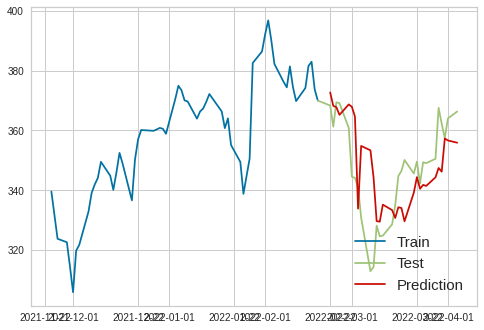

In [102]:
forecast3 = pd.DataFrame(forecast3, index = mastercarddf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(mastercarddf[-90:-30]["Adj Close"], label="Train")
plt.plot(mastercarddf[-31:]["Adj Close"], label="Test")
plt.plot(forecast3, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 4. Machine Learning

In [103]:
mastercarddf = yf.download("MA", start="2017-01-01", progress=False)
amazondf = yf.download("AMZN", start="2017-01-01", progress=False)
eurodf = yf.download("USDEUR=X", start="2017-01-01", progress=False)
treasurydf = yf.download("^TNX", start="2017-01-01", progress=False)
inflationdf = yf.download("FCPI", start="2017-01-01", progress=False)

In [104]:
mastercarddf.head(3)
amazondf.head(3)
eurodf.head(3)
treasurydf.head(3)
inflationdf.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,104.410004,105.940002,104.110001,105.389999,102.280418,4711300
2017-01-04,105.339996,106.750000,104.860001,106.389999,103.250916,3299000
2017-01-05,107.050003,108.150002,106.459999,106.989998,104.048378,3262200


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,757.919983,758.760010,747.700012,753.669983,753.669983,3521100
2017-01-04,758.390015,759.679993,754.200012,757.179993,757.179993,2510500
2017-01-05,761.549988,782.400024,760.260010,780.450012,780.450012,5830100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,0.94960,0.95550,0.9487,0.94994,0.94994,0
2017-01-03,0.95610,0.96640,0.9531,0.95602,0.95602,0
2017-01-04,0.95984,0.96234,0.9543,0.95970,0.95970,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2.511,2.518,2.448,2.450,2.450,0
2017-01-04,2.456,2.474,2.434,2.452,2.452,0
2017-01-05,2.439,2.443,2.346,2.368,2.368,0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-07,25.070000,25.110001,25.028999,25.028999,23.581009,1400
2019-11-08,25.110001,25.134001,25.030001,25.134001,23.679937,1200
2019-11-11,25.129999,25.129999,25.080000,25.103001,23.650732,3300


In [105]:
masterdf = pd.concat([mastercarddf["Adj Close"], amazondf["Adj Close"], eurodf["Adj Close"], treasurydf["Adj Close"], inflationdf["Adj Close"]], axis=1, join="inner")
masterdf.columns = ["mastercard price", "amazon price", "euro price", "treasury price", "inflation price"]
# masterdf = np.log(masterdf).diff(1).dropna()
# masterdf.columns = [colname.replace("price", "return") for colname in masterdf.columns]

In [106]:
masterdf.head(3)

,mastercard price,amazon price,euro price,treasury price,inflation price
Date,,,,,
2019-11-07,269.648956,1788.199951,0.903310,1.926,23.581009
2019-11-08,271.724731,1785.880005,0.907466,1.933,23.679937
2019-11-11,273.810455,1771.650024,0.907240,1.943,23.650732


In [107]:
import copy

def ts2mldataset(ts, lag=5):
  dflist = []
  df = copy.deepcopy(masterdf)
  df.columns = [colname+"(t)" for colname in df.columns]
  dflist.append(df)

  for ii in range(1, lag+1):
    df = copy.deepcopy(masterdf)
    df.columns = [colname+f"(t-{ii})" for colname in df.columns]

    for jj in range(ii):
      df = df.shift(1)
    dflist.append(df)

  return pd.concat(dflist, axis=1)

In [108]:
mldf = ts2mldataset(masterdf, lag=10)

In [109]:
mldf.dropna(inplace=True)
mldf.shape
mldf.head(3)

(596, 55)

,mastercard price(t),amazon price(t),euro price(t),treasury price(t),inflation price(t),mastercard price(t-1),amazon price(t-1),euro price(t-1),treasury price(t-1),inflation price(t-1),...,mastercard price(t-9),amazon price(t-9),euro price(t-9),treasury price(t-9),inflation price(t-9),mastercard price(t-10),amazon price(t-10),euro price(t-10),treasury price(t-10),inflation price(t-10)
Date,,,,,,,,,,,,,,,,,,,,,
2019-11-21,281.174713,1734.709961,0.90262,1.772,23.786402,282.093933,1745.530029,0.902527,1.738,23.829737,...,271.724731,1785.880005,0.907466,1.933,23.679937,269.648956,1788.199951,0.903310,1.926,23.581009
2019-11-22,279.316284,1745.719971,0.90368,1.774,23.874022,281.174713,1734.709961,0.902620,1.772,23.786402,...,273.810455,1771.650024,0.907240,1.943,23.650732,271.724731,1785.880005,0.907466,1.933,23.679937
2019-11-25,284.298218,1773.839966,0.90723,1.764,24.087889,279.316284,1745.719971,0.903680,1.774,23.874022,...,273.948761,1778.000000,0.906170,1.909,23.698778,273.810455,1771.650024,0.907240,1.943,23.650732


In [110]:
from pycaret.regression import *
import pandas as pd

In [ ]:
# compare_models()

In [111]:
maxlen = len(mldf)
forecast4 = []
from tqdm import tqdm

modelsetup = setup(data = mldf[:maxlen-30], target = 'mastercard price(t)', 
                  ignore_features = [],normalize = True,
                  transformation= True, transformation_method = 'yeo-johnson', 
                  transform_target = False, remove_outliers= True,
                  remove_multicollinearity = True,
                  ignore_low_variance = True, combine_rare_levels = True, silent=True)
cat_boost = create_model('catboost')
tuned_catboost = tune_model(cat_boost)

for ii in tqdm(range(30)):
  modelsetup = setup(data = mldf[ii:ii+maxlen-30], target = 'mastercard price(t)', 
                   ignore_features = [],normalize = True,
                   transformation= True, transformation_method = 'yeo-johnson', 
                   transform_target = False, remove_outliers= True,
                   remove_multicollinearity = True,
                   ignore_low_variance = True, combine_rare_levels = True, silent=True)
  tuned_catboost = finalize_model(tuned_catboost)
  forecast4.append(tuned_catboost.predict(mldf.iloc[-30+ii]))

,Description,Value
0,session_id,3005
1,Target,mastercard price(t)
2,Original Data,"(566, 55)"
3,Missing Values,False
4,Numeric Features,54
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(376, 5)"


100%|██████████| 30/30 [06:08<00:00, 12.28s/it]


In [112]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(mastercarddf[-30:]["Adj Close"], forecast4, squared=False)
print(f"RMSE={rmse:.2f}")

RMSE=29.10


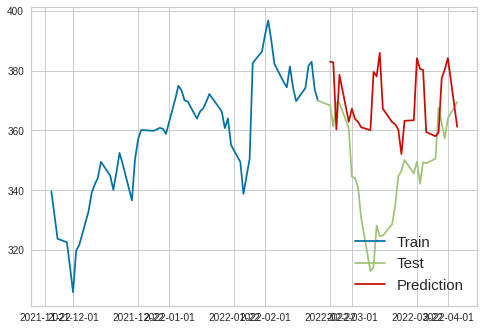

In [113]:
forecast4 = pd.DataFrame(forecast4, index = mastercarddf[-30:]["Adj Close"].index, columns=['Prediction'])
plt.plot(mastercarddf[-90:-30]["Adj Close"], label="Train")
plt.plot(mastercarddf[-31:]["Adj Close"], label="Test")
plt.plot(forecast4, label="Prediction")
plt.legend(loc='lower right', fontsize=15)
plt.show()